<a href="https://colab.research.google.com/github/PKCP-6710120021/240-674-MACHINE-LEARNING-67-/blob/main/Mini_Project_The_analysis_of_email_classification_as_spam_using_SVM_and_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# โหลดชุดข้อมูล SpamBase จาก UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
column_names = [f"feature_{i}" for i in range(57)] + ['label']  # ตั้งชื่อคอลัมน์
data = pd.read_csv(url, header=None, names=column_names)

In [ ]:
import pandas as pd

summary = data.describe()
display(summary)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,label
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


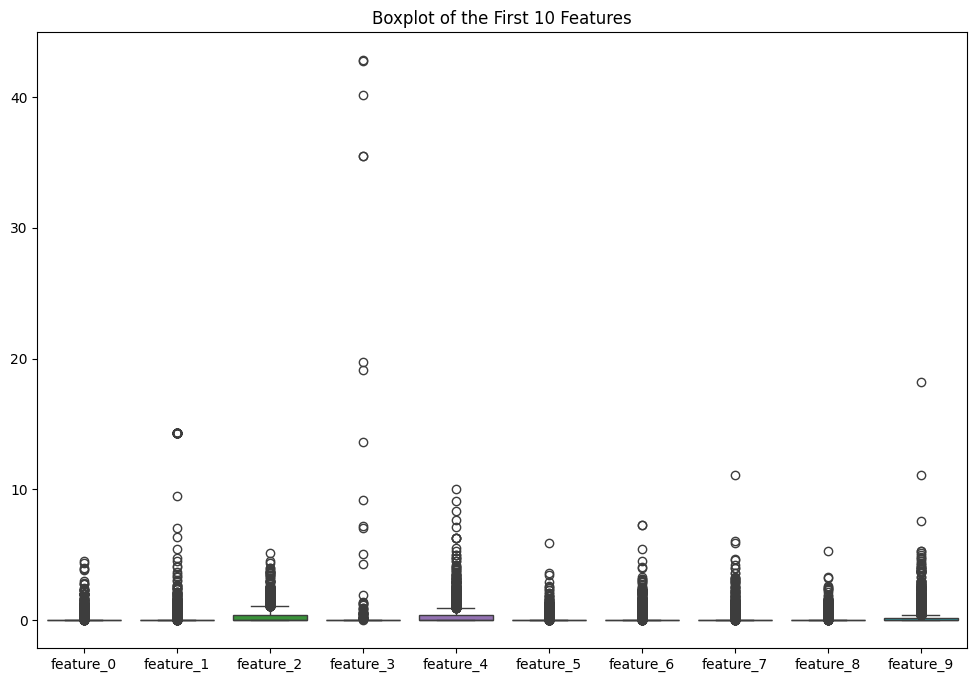

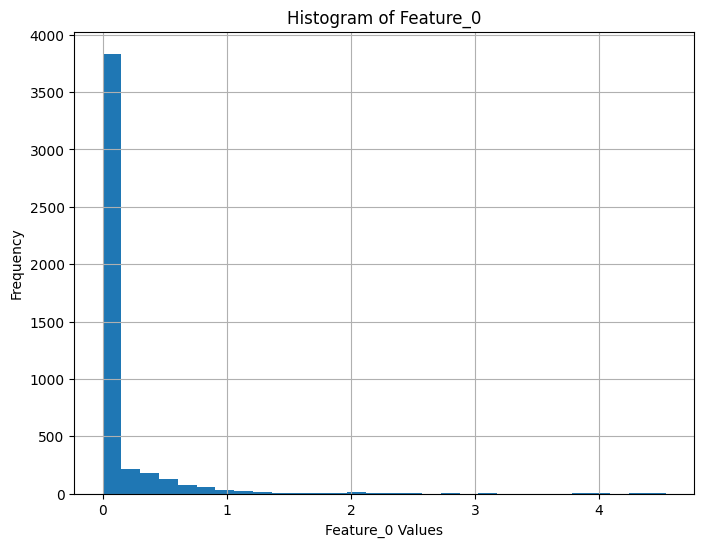

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update(plt.rcParamsDefault)

plt.figure(figsize=(12, 8))
sns.boxplot(data=data.iloc[:, :10])  # สร้าง boxplot ของฟีเจอร์ 10 อันดับแรก
plt.title("Boxplot of the First 10 Features")
plt.show()

plt.figure(figsize=(8, 6))
data['feature_0'].hist(bins=30)
plt.title('Histogram of Feature_0')
plt.xlabel('Feature_0 Values')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# แบ่งข้อมูลเป็นฟีเจอร์ (X) และป้ายกำกับ (y)
X = data.drop(columns=['label'])
y = data['label']

# แบ่งข้อมูลเป็นชุดฝึกสอน (80%) และชุดทดสอบ (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# สร้างและฝึกโมเดล SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# สร้างและฝึกโมเดล Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# ทำนายผลด้วย SVM
y_pred_svm = svm_model.predict(X_test)

# ทำนายผลด้วย Random Forest
y_pred_rf = rf_model.predict(X_test)

# คำนวณความแม่นยำของ SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"ความแม่นยำของ SVM: {accuracy_svm * 100:.2f}%")
print(classification_report(y_test, y_pred_svm))

# คำนวณความแม่นยำของ Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"ความแม่นยำของ Random Forest: {accuracy_rf * 100:.2f}%")
print(classification_report(y_test, y_pred_rf))


ความแม่นยำของ SVM: 92.29%
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       531
           1       0.93      0.88      0.91       390

    accuracy                           0.92       921
   macro avg       0.92      0.92      0.92       921
weighted avg       0.92      0.92      0.92       921

ความแม่นยำของ Random Forest: 95.55%
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       531
           1       0.98      0.92      0.95       390

    accuracy                           0.96       921
   macro avg       0.96      0.95      0.95       921
weighted avg       0.96      0.96      0.96       921



In [ ]:
# สร้างตารางเปรียบเทียบความแม่นยำ
comparison_df = pd.DataFrame({
    'Model': ['SVM', 'Random Forest'],
    'Accuracy': [accuracy_svm, accuracy_rf]
})

# บันทึกตารางเป็นไฟล์ CSV
comparison_df.to_csv('model_comparison.csv', index=False)

# แสดงตาราง
print(comparison_df)


           Model  Accuracy
0            SVM  0.922910
1  Random Forest  0.955483
